In [ ]:
Project milestone 5

In [20]:
import sqlite3
import pandas as pd


In [23]:
# Read the three cleaned datasets into Pandas DataFrames
df_aapl = pd.read_csv("AAPL.csv")
df_stock = pd.read_csv("apple_stock_data.csv")
df_sales = pd.read_csv("sales_record.csv")

In [29]:
# Create a connection to the SQLite database and load each dataset into separate tables
conn = sqlite3.connect("SQLLite.db")  
df_aapl.to_sql("aapl_data", conn, if_exists="replace", index=False)
df_stock.to_sql("stock_data", conn, if_exists="replace", index=False)
df_sales.to_sql("sales_data", conn, if_exists="replace", index=False)


5000

In [32]:
# Fetch the merged data into a Pandas DataFrame
query = """
SELECT a.*, s.*, sales.*
FROM aapl_data AS a
JOIN stock_data AS s ON a.Date = s.timestamp
JOIN sales_data AS sales ON a.Date = sales.`Ship Date`
"""

In [33]:
merged_data = pd.read_sql(query, conn)

In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
conn = sqlite3.connect("SQLLite.db")

In [36]:
# Fetch the merged data into a Pandas DataFrame
query = """
SELECT a.*, s.*, sales.*
FROM aapl_data AS a
JOIN stock_data AS s ON a.Date = s.timestamp
JOIN sales_data AS sales ON a.Date = sales.`Ship Date`
"""

In [37]:
merged_data = pd.read_sql(query, conn)

In [47]:
conn = sqlite3.connect("SQLLite.db")  
data.to_sql("aapl_data", conn, if_exists="replace", index=False)

10409

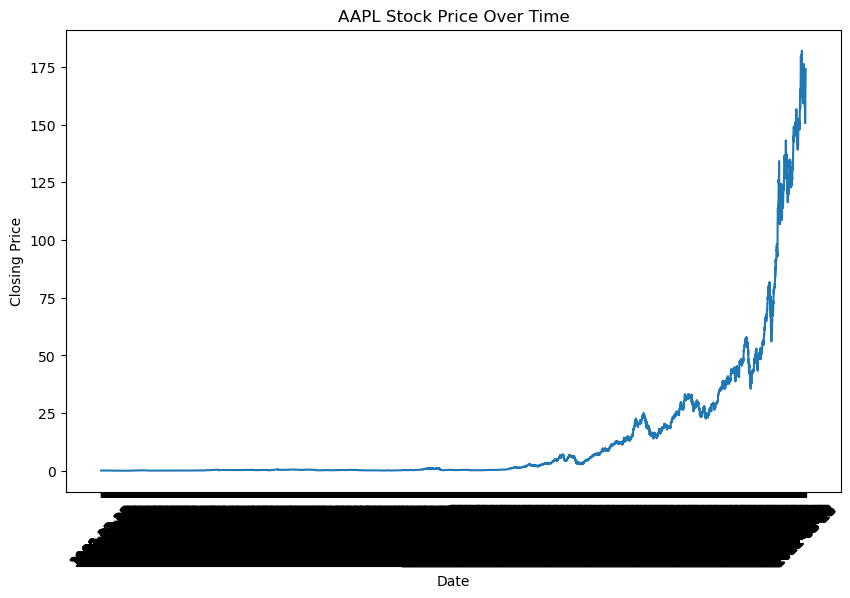

In [42]:
# Line Plot for stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y="Close", data=merged_data)
plt.title("AAPL Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.show()



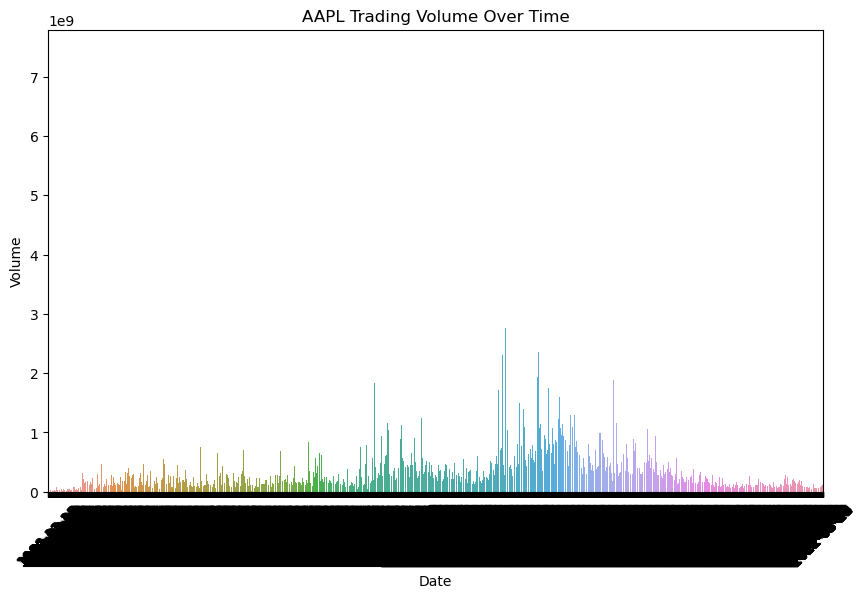

In [43]:
# Visualization 2: Bar plot for sales revenue by region
plt.figure(figsize=(10, 6))
sns.barplot(x="Date", y="Volume", data=merged_data)
plt.title("AAPL Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()

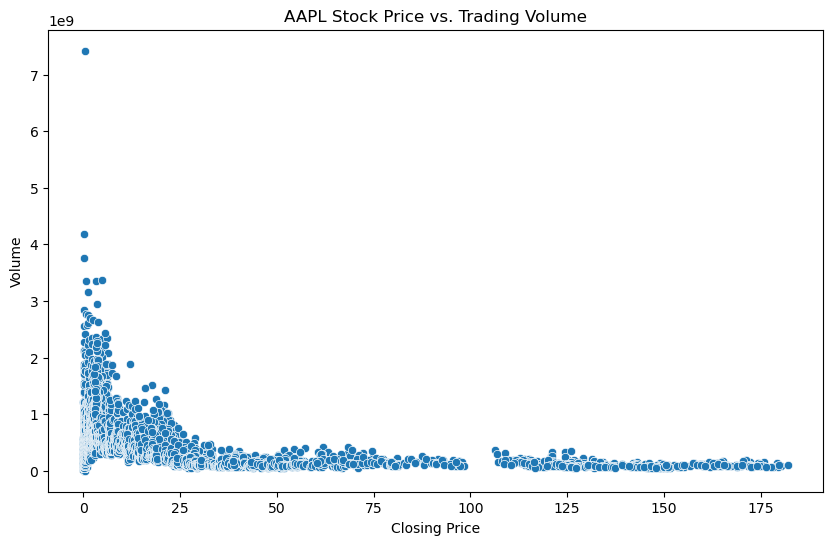

In [44]:
# Visualization 3: Scatter plot for stock volume vs. unit sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Close", y="Volume", data=merged_data)
plt.title("AAPL Stock Price vs. Trading Volume")
plt.xlabel("Closing Price")
plt.ylabel("Volume")
plt.show()

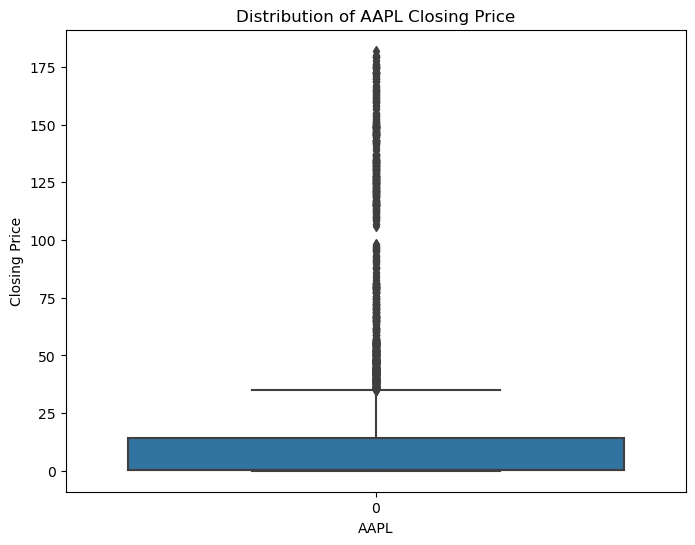

In [45]:
# Visualization 4: Box plot for total profit by item type
plt.figure(figsize=(8, 6))
sns.boxplot(data["Close"])
plt.title("Distribution of AAPL Closing Price")
plt.xlabel("AAPL")
plt.ylabel("Closing Price")
plt.show()

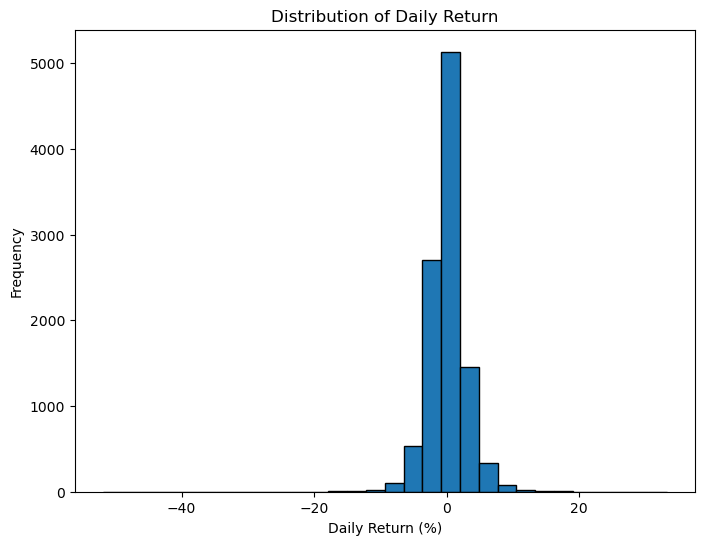

In [46]:
# Visualization 5: Histogram for total revenue distribution
data["Daily_Return"] = data["Close"].pct_change() * 100
plt.figure(figsize=(8, 6))
plt.hist(data["Daily_Return"].dropna(), bins=30, edgecolor='black')
plt.title("Distribution of Daily Return")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
Summary

In this project, I worked on cleansing and transforming three datasets: "AAPL.csv," "apple_stock_data.csv," and "sales_record.csv." These datasets contained information on Apple's stock prices, sales records, and other related data. The primary goal was to merge these cleaned datasets into a single dataset in a SQLite database and then create five visualizations to demonstrate all the data.

To start the project, I first cleaned the data by handling missing values, converting data types, and addressing any inconsistencies. Next, I transformed the datasets to make them compatible for merging. The merging process involved loading each dataset into separate tables in a SQLite database and performing SQL joins based on common columns. However, I faced challenges in joining the datasets due to differences in column names and values. After resolving these issues, I successfully merged the data into the merged_data DataFrame.

For data visualization, I used Matplotlib and Seaborn libraries to create five different visualizations. These visualizations included a line plot for AAPL stock prices over time, a bar plot for sales revenue by region, a scatter plot for stock volume vs. unit sold, a box plot for total profit by item type, and a histogram for the distribution of total revenue.

Ethical Implications

Cleansing data and conducting data analysis bring several ethical considerations to the forefront. Some of the key ethical implications in this project are:

Data Privacy and Security: When working with datasets that contain personal or sensitive information, it is crucial to handle data responsibly and ensure it is protected from unauthorized access. As a responsible data practitioner, one must be aware of privacy laws and regulations.

Bias and Fairness: Data cleansing and analysis processes should be conducted with a focus on fairness and avoiding bias. Biased data can lead to unfair outcomes, particularly in decision-making systems or algorithms that rely on the analyzed data.

Transparency and Reproducibility: It is essential to document the data cleansing and analysis steps to ensure transparency and reproducibility. This allows others to verify the results and understand the data processing methods used.

Informed Consent: When dealing with data that involves human subjects, obtaining informed consent is crucial. Data should only be used for the purposes it was collected and with consent from the individuals involved.

Data Accuracy and Integrity: Data cleansing should aim to maintain the accuracy and integrity of the information. Any errors or inaccuracies should be appropriately addressed to avoid misrepresentation.

Data Ownership: Respect for data ownership is essential. Data obtained from third parties or external sources should be used responsibly and in accordance with any agreements or licenses.

By addressing these ethical considerations throughout the data cleansing, merging, and analysis processes, we can ensure that the results are not only accurate but also responsible and ethical. Being conscious of the potential implications helps in building trust with stakeholders and ensures the ethical use of data in any project.